In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [ ]:
train_dir = '/content/drive/MyDrive/BrainTumorMRI/Training'
test_dir = '/content/drive/MyDrive/BrainTumorMRI/Testing'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='constant'
)


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1311 images belonging to 4 classes.


In [ ]:
x_train, y_train = [], []
for i in range(len(train_generator)):
    x, y = train_generator[i]
    x_train.extend(x)
    y_train.extend(y)

In [ ]:
x_train[100]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
y_train[1]

array([0., 0., 0., 1.], dtype=float32)

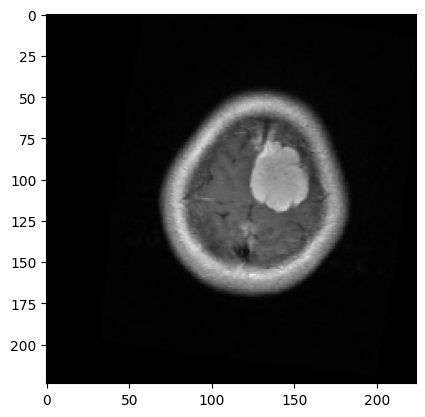

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[50])
plt.show()


In [ ]:
x_test, y_test = [], []
for i in range(len(test_generator)):
    x, y = test_generator[i]
    x_test.extend(x)
    y_test.extend(y)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (5712, 224, 224, 3), y_train shape: (5712, 4)
x_test shape: (1311, 224, 224, 3), y_test shape: (1311, 4)


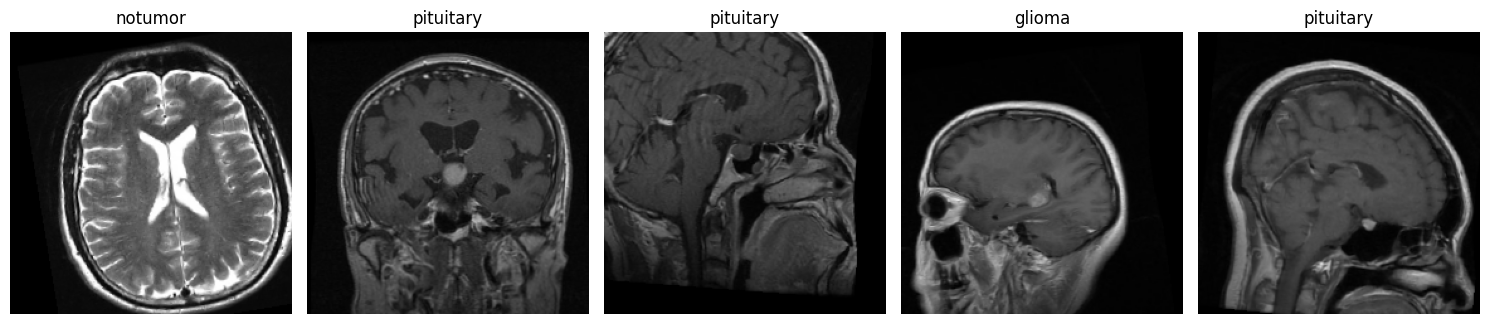

In [ ]:
def display_sample_images(images, labels, class_names, num_images=5):
    plt.figure(figsize=(15, 10))

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

class_names = list(train_generator.class_indices.keys())

display_sample_images(x_train[:5], y_train[:5], class_names)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

vgg_model=Sequential()
vgg_model.add(tf.keras.layers.Input(shape=(224,224,3)))
pretrained_model= tf.keras.applications.VGG16(include_top=False,
                                                input_shape=(224,224,3),
                                                pooling='avg',classes=4,
                                                weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512,activation='relu'))
vgg_model.add(Dense(4,activation='softmax'))

vgg_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 14979396 (57.14 MB)
Trainable params: 264708 (1.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

vgg_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:


history = vgg_model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(x_test, y_test)
)


Epoch 1/30
179/179 [==============================] - 122s 676ms/step - loss: 0.7111 - accuracy: 0.7468 - val_loss: 0.6139 - val_accuracy: 0.7902
Epoch 2/30
179/179 [==============================] - 119s 664ms/step - loss: 0.4345 - accuracy: 0.8466 - val_loss: 0.5325 - val_accuracy: 0.8040
Epoch 3/30
179/179 [==============================] - 119s 664ms/step - loss: 0.3692 - accuracy: 0.8704 - val_loss: 0.5054 - val_accuracy: 0.8253
Epoch 4/30
179/179 [==============================] - 119s 664ms/step - loss: 0.3430 - accuracy: 0.8755 - val_loss: 0.6368 - val_accuracy: 0.7780
Epoch 5/30
179/179 [==============================] - 120s 672ms/step - loss: 0.3121 - accuracy: 0.8853 - val_loss: 0.4373 - val_accuracy: 0.8413
Epoch 6/30
179/179 [==============================] - 120s 670ms/step - loss: 0.2953 - accuracy: 0.8955 - val_loss: 0.4515 - val_accuracy: 0.8383
Epoch 7/30
179/179 [==============================] - 119s 668ms/step - loss: 0.2823 - accuracy: 0.8992 - val_loss: 0.3897 -

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

y_pred = vgg_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes))


41/41 [==============================] - 23s 556ms/step
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       300
           1       0.84      0.82      0.83       306
           2       0.93      0.97      0.95       405
           3       0.90      0.99      0.94       300

    accuracy                           0.90      1311
   macro avg       0.90      0.90      0.90      1311
weighted avg       0.90      0.90      0.90      1311



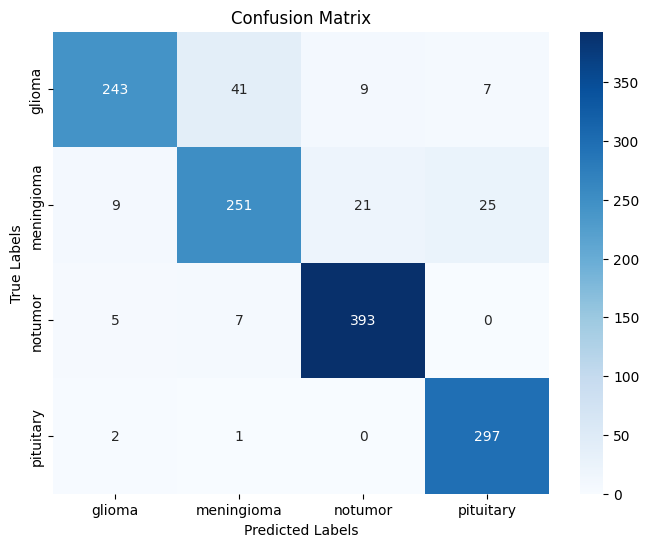

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
import numpy as np
def predict_image_class(image_path):
  """
  Predicts the class of an image using the trained model.

  Args:
    image_path: Path to the image file.

  Returns:
    A tuple containing the predicted class index and class name.
  """
  img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.

  prediction = vgg_model.predict(img_array)
  predicted_class_index = np.argmax(prediction)
  predicted_class_name = class_names[predicted_class_index]

  return predicted_class_name


In [ ]:
predict_image_class('/content/drive/MyDrive/BrainTumorMRI/Testing/notumor/Te-no_0015.jpg')

1/1 [==============================] - 0s 76ms/step


'notumor'

In [ ]:
predict_image_class('/content/drive/MyDrive/BrainTumorMRI/Testing/meningioma/Te-meTr_0006.jpg')

1/1 [==============================] - 0s 67ms/step


'notumor'

In [ ]:
# prompt: import this trained model in a pickel file

import pickle

# Save the model to a pickle file
filename = 'brain_tumor_model.sav'
pickle.dump(vgg_model, open(filename, 'wb'))


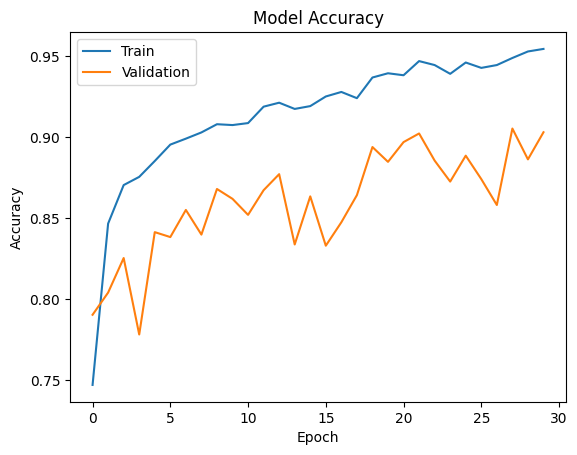

In [ ]:
# prompt: plot accuracy vs epoch graph

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


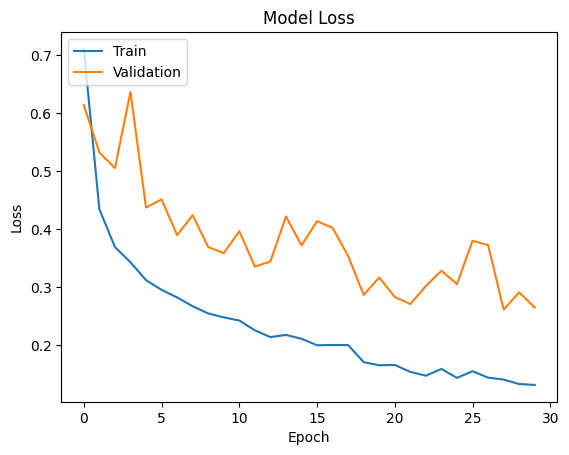

In [ ]:
# prompt: plot loss vs epochs graph

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# prompt: import this trained model in a pickel file

import pickle

# Save the model to a pickle file
filename = 'brain_tumor_model_final.sav'
pickle.dump(vgg_model, open(filename, 'wb'))


In [ ]:
# prompt: generate and download h5 file of this model

vgg_model.save('brain_tumor_model.h5')
from google.colab import files
files.download('brain_tumor_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: generate and call a function to predict class using image

import numpy as np
def predict_image_class_from_upload():
  uploaded = files.upload()
  for fn in uploaded.keys():
    image_path = fn
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = vgg_model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_names[predicted_class_index]

    print(f"The predicted class for the uploaded image is: {predicted_class_name}")


predict_image_class_from_upload()


Saving Tr-gl_0013.jpg to Tr-gl_0013.jpg
1/1 [==============================] - 0s 70ms/step
The predicted class for the uploaded image is: glioma
